# Automatic creation of system model with Neo4j

## Introduction
Frequently there are legacy systems/applications with no previous documentation, and the lack of it makes maintenance and further development of those systems/applications stagnant and demanding. This particular article outlines the ability of graphs (created through the **Neo4j** database) to automate the creation of documentation in the form of ArchiMate model in **Sparx Enterprise Architect** or **Archi**. 

We will create an ArchiMate model for the legacy application that will describe basic entities, such as **screens, fragments, roles, files** and **relations** between them. An **HTML version** of the automatically generated ArchiMate model is available [**here**](http://www.bobovo.eu/ScreenModel/index.html). It's an export from Sparx Enterprise Architect to HTML.

In the analytic part of this article, we use **the graph** to identify:
- application communities
- communities where fragments are used
- communities with fewer screens than roles
- the missing role setting in a linked screen
- unused parts of the application
- risk business processes

## Example

An illustrative example of two screens and its relations to other screens, fragments, roles and files is below:
An illustrative example of the relation between two screens and other fragments, roles and files is below:

![Screen example](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_screen_example.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_screen_example.jpg?raw=true")

Even if there is only the source code of the application, there is a way (by source code scrapping) to obtain all required information. The source code scrapping should be implemented accordingly to the specific application. However, it is not covered in this article.

The example of an outcome from the scrapping for one **screen** (Screen_414) in a **json** format is below:

![Screen example](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_screen_example_json.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_screen_example_json.jpg?raw=true")

The **json** definition of the **screen** (Screen_414) and its relations to screens, fragments, roles and files is possible to transform to a **graph** (nodes and relationships):

![Screen example](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_screen_example_json_graph.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_screen_example_json_graph.jpg?raw=true")

The **graph** (Screen_414) and its nodes and relationships are possible to represent as an Archimate model. There are two steps:
- an export graf to ArchiMate® 3.1 Model Exchange File definition
- an import ArchiMate® 3.1 Model Exchange File definition to **Sparx Enterprise Architect** or **Archi**

![Screen example](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/neo4j_graph_model.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/neo4j_graph_model.jpg?raw=true")

The example of **automatically** created documentation for the **screen** (Screen_414) in Sparx Enterprise Architect:

![Database schema](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_model_example.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_model_example.jpg?raw=true")

##  Solution architecture

The solution is a mix of the following technologies, tools and standards:
- Python
- Jupyter Notebook
- Neo4j (Neo4j Sandbox)
- Neo4j Bloom
- Neo4j APOC Library
- Graph Data Science Playground
- Cypher
- ArchiMate
- ArchiMate® 3.1 Model Exchange File definition
- Sparx Enterprise Architect
- Archi
- VB script

![Database schema](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_architecture.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_architecture.jpg?raw=true")

**Description of architecture components**

| Component | Description |
| :- | :------------- |
| Legacy application | A system/application for which the documentation will be created. |
| Source code scrapping | An implemented functionality. The file as an outcome from the application source code scrapping (in json format) containing information about screens, fragments, roles, files and relations between them. The application code scrapping isn't covered in this article. <p> <p> The anonymized file is available here:  [screenList_20210105_anonymized.json](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ImportFromFile/screenList_20210105_anonymized.json "File screenList_20210105_anonymized.json") |
| Python / Neo4j | The Python script in Jupyter Notebook using a graph database [Neo4j](https://neo4j.com/ "Neo4j graph database"). <p> There is a possibility to use [Sandbox](https://neo4j.com/sandbox/) and create new Neo4j database in less than 60 seconds. No download required. |
| Import definition to Neo4j | Part of the Python script. The script imports data from file [screenList_20210105_anonymized.json](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ImportFromFile/screenList_20210105_anonymized.json "File screenList_20210105_anonymized.json") to graph database Neo4j. |
| Generate ArchiMate model definition | Part of the Python script. The script creates valid file in format [ArchiMate® 3.1 Model Exchange File definition](https://www.opengroup.org/xsd/archimate/): <p><p>- [screen_model.xml](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screen_model.xml "File in format ArchiMate® 3.1 Model Exchange File definition") <p><p> The ArchiMate Model Exchange File Format is a standard file format that can be used to exchange ArchiMate models between tools that create or interpret ArchiMate models. The scope of the standard is restricted to the elements and the relationships of an ArchiMate model. It excludes features that are vendor specific. |
| Generate model diagram definition | Part of the Python script. The script creates files with the definition of diagrams: <p><p>- [screens.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screens.csv)<p>- [roles.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/roles.csv) <p>- [fragments.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/fragments.csv) <p>- [links.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/links.csv) |
| Sparx Enterprise Architect | [Sparx Enterprise Architect](https://sparxsystems.com/ "Sparx Enterprise Architect") is a visual platform for designing and constructing software systems, business process modeling, and more generalized modeling purposes. |
| Create ArchiMate model | A given functionality of [Sparx Enterprise Architect](https://sparxsystems.com/ "Sparx Enterprise Architect").  We have a valid ArchiMate® 3.1 Model Exchange File. <p>It is possible to [import](https://sparxsystems.com/enterprise_architect_user_guide/15.2/model_domains/imparchmeff.html "Import ArchiMate® 3.1 Model Exchange File") generated file [screen_model.xml](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screen_model.xml "File in format ArchiMate® 3.1 Model Exchange File definition") into a [prepared](https://github.com/pospisilboh/ScreenDocumentation/blob/main/EnterpriseArchitectModel/model_template.eapx "Prepared EA file with VB script") Enterprise Architect project as a UML model. <p>To import an Open Exchange Format file, in Ribbon select the item **"Specialize > Technologies > ArchiMate > Import Model Exchange File"**. Click on the Import button to import the selected Model Exchange file into the specified Package. |
| Create ArchiMate model diagrams | An implemented functionality by VB script [#1 generate_archimate_diagrams.vbs](https://github.com/pospisilboh/ScreenDocumentation/blob/main/EnterpriseArchitectModel/%231%20generate_archimate_diagrams.vbs "VBA script") in the [prepared](https://github.com/pospisilboh/ScreenDocumentation/blob/main/EnterpriseArchitectModel/model_template.eapx "Prepared EA file with VB script") Enterprise Architect project. The VB script generates diagrams using the definition in files: <p><p>- [screens.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screens.csv)<p>- [roles.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/roles.csv) <p>- [fragments.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/fragments.csv) <p>- [links.csv](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/links.csv) <p> To run the VB script, select context menu item "[Specialize->Scripts->#1 generate_archimate_diagrams](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_run_script.jpg "Run VB script")" |
| Archi | [Archi](https://www.archimatetool.com/ "Archi") is an open-source modelling toolkit to create ArchiMate models and sketches. |
| Create ArchiMate model | A given functionality of [Archi](https://www.archimatetool.com/ "Archi"). <p>It is possible to [import](https://... "Import ArchiMate® 3.1 Model Exchange File") a generated file [screen_model.xml](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screen_model.xml "File in format ArchiMate® 3.1 Model Exchange File definition") and create a new ArchiMate model. <p>To import an Open Exchange Format file, select the menu item **"File->Import->Open Exchange XML Model..."**. Select and open the required XML file. This will create a new ArchiMate model in the Models Tree. |

### Create ArchiMate model diagrams in Sparx Enterprise Architect

**Magic** how to automatically generate diagrams in Sparx Enterprise Architect is in the VB script [#1 generate_archimate_diagrams.vbs](https://github.com/pospisilboh/ScreenDocumentation/blob/main/EnterpriseArchitectModel/%231%20generate_archimate_diagrams.vbs "VBA script"). The VB script generates diagrams using the definition in files:
- creates a new diagram, 
- inserts defined elements
- formats the layout of the elements in the diagram.

For example by following diagram definition:

<small>***DiagramName;NodeKeys;Documentation<p>Role_1269;['NEOID_3e19fa29-bae1-48da-88bc-d1ffa17c4a8a', 'NEOID_9f0d17d0-9076-452b-90cd-c64fc6892f60'];The diagram describes the role Role_1269.***</small>

the following diagram is generated:

![Database schema](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_diagram.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_diagram.jpg?raw=true") 

## Graph database schema

The graph consists of 343 screens, 159 fragments, 36 roles and 465 files. A visual scheme of our graph database is given below.

![Database schema](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/neo4j_db_schema.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/neo4j_db_schema.jpg?raw=true")  

**Node labels**

| Node Labels | Description | Properties with examples |
| :- | :------------- | :- |
| Screen | The screen of application. | <p> "path": "/WEB-INF/tiles/adm/Screen_414.jsp" <p>"fileName": "Screen_414.jsp" <p>"code": "Screen_414" <p>"documentation": "Screen ... <p>"name": "Screen_414" <p>"link": "ADM033" <p>"alias": "Title of Screen_414" <p> "id": "NEOID_cfabe9f8-ff6c-4ee6-ab19-ae0bdc7f192e" <p>"class": "ApplicationComponent" <p>"group": "ADM" |
| Fragment | The fragment belongs to the screen or other fragments. | <p>"path": "/tiles/com/fragments/Fragment_1297.jsp" <p>"fileName": "Fragment_1297.jsp" <p> "documentation": "Fragment ... " <p> "name": "Fragment_1297" <p> "id": "NEOID_0fdcc7a5-1889-4fb6-aa62-94bf5128f840" <p>"class": "ApplicationComponent" |
| File | The file where the screen or the fragment source code is defined. | <p>"name": "Fragment_1315.jsp" <p>"path": "/tiles/com/fragments/Fragment_1315.jsp" <p>"id": "NEOID_04ff5f05-a207-4b8d-a1e8-928f187822e1" <p>"class": "DataObject" <p>"documentation": "File ..." |
| Role | The role that restricts access to the screen.  | <p>"name": "Role_1259" <p>"id": "NEOID_44086a73-aa07-423e-a119-449e12e7ff9b" <p>"class": "DataObject" <p>"documentation": "Role ... " |

**Relationship Types**

| Relationship Types | Description |
| :- | :------------- |
| FlowRelationships | Relation represents the possible transition from one screen to another (name: 'LINK_TO'). |
| CompositionRelationships | Relation represents that fragment is part of the screen or another fragment (name: 'HAS_FRAGMENT'). |
| AssociationRelationships | Relation represents that screen or fragment source code is defined in the file (name: 'HAS_FILE'). <br> Relation represents a role which controls access to the screen (name: 'HAS_ROLE'). |

## Description of how to generate documentation
1. Create new Neo4j database (https://neo4j.com/sandbox/)
2. Set Python script parameters:
    - boltUrl
    - password
    - exportPath
3. Run the Python script and generete files:
    - screen_model.xml
    - screens.csv
    - roles.csv
    - fragments.csv
    - links.csv
4. [Import](https://sparxsystems.com/enterprise_architect_user_guide/15.2/model_domains/imparchmeff.html "Import ArchiMate® 3.1 Model Exchange File") generated file [screen_model.xml](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ExportFromNeo4j/screen_model.xml "File in format ArchiMate® 3.1 Model Exchange File definition") into a [prepared](https://github.com/pospisilboh/ScreenDocumentation/blob/main/EnterpriseArchitectModel/model_template.eapx "Prepared EA file with VB script") Enterprise Architect project as a model.
To import an Open Exchange Format file, in Ribbon, select the item **"Specialize > Technologies > ArchiMate > Import Model Exchange File"**. Click on the Import button to import the selected Model Exchange file into the specified Package.
5. Run a script in **Sparx Enterprise Architect**. To run the VB script, select context menu item "[Specialize->Scripts->#1 generate_archimate_diagrams](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_run_script.jpg "Run VB script")". Diagrams are generated using the definition in files: 
    - screens.csv
    - roles.csv
    - fragments.csv
    - links.csv

## Implementation

### Set parameters

In [1]:
# Neo4j database connection properties
boltUrl = "bolt://localhost:7687"
userName = "neo4j"
password = "GraphAlg"

definitionUrl = "https://raw.githubusercontent.com/pospisilboh/ScreenDocumentation/main/ImportFromFile/screenList_20210105_anonymized.json?raw=true"
groupDefinitionUrl = "https://raw.githubusercontent.com/pospisilboh/ScreenDocumentation/main/ImportFromFile/group_role.csv?raw=true"
processDefinitionUrl = "https://raw.githubusercontent.com/pospisilboh/ScreenDocumentation/main/ImportFromFile/screen_process.csv?raw=true"

exportPath = "c:/Work/ApplicationX/Model/ExportFromNeo4j/"
modelName = "screen_model.xml"

In [2]:
# pip install neo4j-driver

from neo4j import GraphDatabase, basic_auth

driver = GraphDatabase.driver(
    boltUrl, 
    auth=basic_auth(userName, password))
session = driver.session()

In [3]:
from pandas import DataFrame
import numpy as np

### Create database

In [4]:
# Definition of queries

cypher_query_clear_database = '''

// Clear database

call apoc.periodic.iterate("MATCH (n) return n", "DETACH DELETE n", {batchSize:1000})
yield batches, total return batches, total

'''

cypher_query_import = '''

// Import

CALL apoc.load.json($definitionUrl) YIELD value
WITH value.title AS title, 
     value.code AS code, 
     value.link AS link, 
     value.group AS group, 
     value.fileName AS fileName, 
     value.path AS path, 
     value.roleList AS roleList, 
     value.screenList AS screenList, 
     value.fragmentList AS fragmentList

MERGE (s:Screen:ApplicationComponent {class:'ApplicationComponent', link: ToUPPER(link), fileName: fileName})
ON CREATE SET s.id = 'NEOID_' + apoc.create.uuid(),
              s.name = code,
              s.alias = title,
              s.code = code,
              s.group = group,
              s.path = path,
              s.documentation = 'Screen <b>' + title + '</b>.'
ON MATCH SET  s.name = code,
              s.alias = title,
              s.code = code,
              s.group = group,
              s.path = path,
              s.documentation = 'Screen <b>' + title + '</b>.'

FOREACH (role IN roleList | 
	MERGE (r:Role:DataObject {class:'DataObject', name: role}) 
    ON CREATE SET r.id = 'NEOID_' + apoc.create.uuid(),
    			  r.documentation = 'Role <b>' + role + '</b>.'
    
    MERGE (s)-[r1:AssociationRelationships {class: 'Association', name: 'HAS_ROLE'}]-(r)
    ON CREATE SET r1.id = 'NEOID_' + apoc.create.uuid()
)

FOREACH (fragment IN fragmentList | 
	MERGE (fr:Fragment:ApplicationComponent {class:'ApplicationComponent', name: HEAD(SPLIT(fragment.fileName, '.')), fileName: fragment.fileName, path: fragment.path}) 
    ON CREATE SET fr.id = 'NEOID_' + apoc.create.uuid(),
    			  fr.documentation = 'Fragment <b>' + HEAD(SPLIT(fragment.fileName, '.')) + '</b>.'
    
    MERGE (s)-[r2:CompositionRelationships {class: 'Composition', name: 'HAS_FRAGMENT'}]-(fr)
    ON CREATE SET r2.id = 'NEOID_' + apoc.create.uuid()
    
    FOREACH (subFragment1 IN fragment.subFragmentList | 
    	MERGE (fr1:Fragment:ApplicationComponent {class:'ApplicationComponent', name: HEAD(SPLIT(subFragment1.fileName, '.')), fileName: subFragment1.fileName, path: subFragment1.path}) 
        ON CREATE SET fr1.id = 'NEOID_' + apoc.create.uuid(),
        			  fr1.documentation = 'Fragment <b>' + HEAD(SPLIT(subFragment1.fileName, '.')) + '</b>.'
        
    	MERGE (fr)-[r3:CompositionRelationships {class: 'Composition', name: 'HAS_FRAGMENT'}]-(fr1)
        ON CREATE SET r3.id = 'NEOID_' + apoc.create.uuid()
        
        FOREACH (subFragment2 IN subFragment1.subFragmentList | 
    		MERGE (fr2:Fragment:ApplicationComponent {class:'ApplicationComponent', name: HEAD(SPLIT(subFragment2.fileName, '.')), fileName: subFragment2.fileName, path: subFragment2.path}) 
            ON CREATE SET fr2.id = 'NEOID_' + apoc.create.uuid(),
            			  fr2.documentation = 'Fragment <b>' + HEAD(SPLIT(subFragment2.fileName, '.')) + '</b>.'
            
    		MERGE (fr1)-[r4:CompositionRelationships {class: 'Composition', name: 'HAS_FRAGMENT'}]-(fr2)
            ON CREATE SET r4.id = 'NEOID_' + apoc.create.uuid()
            
            FOREACH (subFragment3 IN subFragment2.subFragmentList | 
    			MERGE (fr3:Fragment:ApplicationComponent {class:'ApplicationComponent', name: HEAD(SPLIT(subFragment3.fileName, '.')), fileName: subFragment3.fileName, path: subFragment3.path}) 
                ON CREATE SET fr3.id = 'NEOID_' + apoc.create.uuid(),
            			      fr3.documentation = 'Fragment <b>' + HEAD(SPLIT(subFragment3.fileName, '.')) + '</b>.'
                
    			MERGE (fr2)-[r5:CompositionRelationships {class: 'Composition', name: 'HAS_FRAGMENT'}]-(fr3)
                ON CREATE SET r5.id = 'NEOID_' + apoc.create.uuid()
        	)
        )
    )
)

FOREACH (screenLink IN screenList | 
	MERGE (sl:Screen:ApplicationComponent {class:'ApplicationComponent', link: ToUPPER(screenLink.link), fileName: screenLink.fileName})
    ON CREATE SET sl.id = 'NEOID_' + apoc.create.uuid()
    
    MERGE (s)-[r6:FlowRelationships {class: 'Flow', name: 'LINK_TO'}]-(sl)
    ON CREATE SET r6.id = 'NEOID_' + apoc.create.uuid()
)

'''

In [5]:
# Definition of queries

cypher_query_create_file = '''

// Create files and relations to files
MATCH (n)
WHERE EXISTS(n.fileName)
WITH n

MERGE (file:File:DataObject {class:'DataObject', name: n.fileName, path: n.path})
ON CREATE SET file.id = 'NEOID_' + apoc.create.uuid(),
              file.documentation = 'File <b>' + n.fileName + '</b>.'

MERGE (n)-[r:AssociationRelationships {class: 'Association', name: 'SAVED_IN'}]-(file)
ON CREATE SET r.id = 'NEOID_' + apoc.create.uuid()

'''

In [6]:
# Definition of queries

cypher_query_documentation_screen_add = '''

MATCH (n:Screen)
WITH n
SET n.documentation = n.documentation + ' <p> <b>Code:</b> <p>- ' + n.code
SET n.documentation = n.documentation + ' <p> <b>File:</b> <p>- ' + n.fileName

'''

cypher_query_documentation_fragment_add = '''

MATCH (n:Fragment)
WITH n
SET n.documentation = n.documentation + ' <p> <b>File:</b> <p>- ' + n.fileName

'''

cypher_query_documentation_add_roles = '''

MATCH (n)-[:AssociationRelationships]->(r:Role)
WITH n, n.id AS ID, r.name As Value
ORDER BY ID, Value
WITH n, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT '- ' + Value)), '<p>') AS Value

SET n.documentation = n.documentation + ' <p> <p> <b>Roles:</b> <p>' + Value

'''

cypher_query_documentation_add_fragments = '''

MATCH (n)-[:CompositionRelationships*]->(f:Fragment)
WITH n, n.id AS ID, f.name As Value
ORDER BY ID, Value
WITH n, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT '- ' + Value)), '<p>') AS Value

SET n.documentation = n.documentation + ' <p> <p> <b>Fragments:</b> <p>' + Value

'''

cypher_query_documentation_add_screens = '''

MATCH (n:Screen)-[:FlowRelationships]->(s:Screen)
WITH n, n.id AS ID, s.name As Value
ORDER BY ID, Value
WITH n, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT '- ' + Value)), '<p>') AS Value

SET n.documentation = n.documentation + ' <p> <p> <b>Screens:</b> <p>' + Value

'''

cypher_query_documentation_role_add_screens = '''

MATCH (r:Role)<-[:AssociationRelationships]->(s:Screen)
WITH r, r.id AS ID, s.name As Value
ORDER BY ID, Value
WITH r, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT '- ' + Value)), '<p>') AS Value

SET r.documentation = r.documentation + ' <p> <p> <b>Screens:</b> <p>' + Value

'''

cypher_query_documentation_fragment_add_screens = '''

MATCH (f:Fragment)<-[:CompositionRelationships*]-(s:Screen)
WITH f, f.id AS ID, s.name As Value
ORDER BY ID, Value
WITH f, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT '- ' + Value)), '<p>') AS Value

SET f.documentation = f.documentation + ' <p> <p> <b>Screens:</b> <p>' + Value

'''

cypher_query_create_elements = '''

//Create elements.csv

MATCH (n)
WHERE EXISTS(n.id)
RETURN n.id AS ID, n.class AS Type, n.name AS Name, COALESCE(n.documentation, '')  AS Documentation

'''

cypher_query_create_relations = '''

//Create relations.csv

MATCH (n)-[r]->(m)
WHERE EXISTS(n.id) AND EXISTS(m.id)
RETURN r.id AS ID, r.class  + 'Relationship' AS Type, COALESCE(r.name, '')  AS Name, COALESCE(r.documentation, '') AS Documentation, n.id AS Source, m.id AS Target

'''

cypher_query_create_properties = '''

//Create properties.csv

MATCH (n)
WHERE EXISTS(n.id)
RETURN n.id AS ID, 'GUID' AS Key, n.id AS Value

UNION
MATCH (n)
WHERE EXISTS(n.id) AND EXISTS(n.code)
RETURN n.id AS ID, 'Code' AS Key, n.code AS Value

UNION
MATCH (n)
WHERE EXISTS(n.id) AND EXISTS(n.path)
RETURN n.id AS ID, 'Path' AS Key, n.path AS Value

UNION
MATCH (n)
WHERE EXISTS(n.id) AND EXISTS(n.fileName)
RETURN n.id AS ID, 'FileName' AS Key, n.fileName AS Value

UNION
MATCH (n)
WHERE EXISTS(n.id) AND EXISTS(n.alias)
RETURN n.id AS ID, 'Alias' AS Key, n.alias AS Value

UNION
MATCH (n)-[:AssociationRelationships]->(r:Role)
WHERE EXISTS(n.id)
WITH n.id AS ID, r.name As Value
ORDER BY ID, Value
RETURN ID, 'Roles' AS Key, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT Value)), ', ') AS Value

UNION
MATCH (n)-[:CompositionRelationships*]->(f:Fragment)
WHERE EXISTS(n.id)
WITH n.id AS ID, f.name As Value
ORDER BY ID, Value
RETURN ID, 'Fragments' AS Key, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT Value)), ', ') AS Value

UNION
MATCH (n:Screen)-[:FlowRelationships]->(s:Screen)
WHERE EXISTS(n.id)
WITH n.id AS ID, s.name As Value
ORDER BY ID, Value
RETURN ID, 'Screens' AS Key, apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT Value)), ', ') AS Value

'''

cypher_query_create_screens = '''

//Create definition for screen diagrams ... screens.csv

MATCH (s:Screen)-[:AssociationRelationships]->(f:File)
OPTIONAL MATCH (s)-[:AssociationRelationships]->(r:Role)
OPTIONAL MATCH (s)-[:CompositionRelationships*1..3]->(fr:Fragment)
OPTIONAL MATCH (s)-[:FlowRelationships]->(so:Screen)
WITH s.group + '.' + s.code + '.' + s.alias AS DiagramName,
collect(DISTINCT s.id) + collect(DISTINCT f.id) + collect(DISTINCT r.id) + collect(DISTINCT fr.id) + collect(DISTINCT so.id) as NodeKeys,
'The diagram describes the screen ' + s.alias + '.' AS Documentation
WHERE DiagramName IS NOT NULL
RETURN DiagramName, NodeKeys, Documentation
    
'''

cypher_query_create_roles = '''

//Create definition for role diagrams ... roles.csv

MATCH (s:Screen)-[:AssociationRelationships]->(r:Role)
WITH r.name AS DiagramName, 
collect(DISTINCT s.id) + collect(DISTINCT r.id) as NodeKeys,
'The diagram describes the role ' + r.name + '.' AS Documentation
RETURN DiagramName, NodeKeys, Documentation

'''

cypher_query_create_fragments = '''

//Create definition for fragment diagrams ... fragments.csv

MATCH (s)-[:CompositionRelationships*1..3]->(fr:Fragment)
OPTIONAL MATCH (fr)-[:CompositionRelationships*1..3]->(frs:Fragment)
OPTIONAL MATCH (fr)<-[:CompositionRelationships*1..3]-(fru:Fragment)
OPTIONAL MATCH (fr)-[:AssociationRelationships]->(f:File)
WITH fr.name AS DiagramName, 
collect(DISTINCT s.id) + collect(DISTINCT f.id) + collect(DISTINCT fr.id) + collect(DISTINCT frs.id) + collect(DISTINCT fru.id) as NodeKeys,
'The diagram describes the fragment ' + fr.name + '.' AS Documentation
RETURN DiagramName, NodeKeys, Documentation

'''

cypher_query_create_links = '''

//Create definition for screen links diagram ... links.csv

MATCH (s1:Screen)-[:FlowRelationships]-(s2:Screen)
OPTIONAL MATCH (s1)-[:AssociationRelationships]->(r1:Role)
OPTIONAL MATCH (s2)-[:AssociationRelationships]->(r2:Role)
WITH 'Transitions between screens' AS DiagramName,
collect(DISTINCT s1.id) + collect(DISTINCT s2.id) + collect(DISTINCT r1.id) + collect(DISTINCT r2.id) as NodeKeys,
'The diagram describes the transitions between screens.' AS Documentation
RETURN DiagramName, NodeKeys, Documentation

'''

In [7]:
# Import common
results = session.run(cypher_query_clear_database, parameters={})
results = session.run(cypher_query_import, definitionUrl=definitionUrl)

# Create Files and relations to Screens and Fragments 
results = session.run(cypher_query_create_file, parameters={})

# Add documentation parts
results = session.run(cypher_query_documentation_screen_add, parameters={})
results = session.run(cypher_query_documentation_fragment_add, parameters={})
results = session.run(cypher_query_documentation_add_roles, parameters={})
results = session.run(cypher_query_documentation_add_screens, parameters={})
results = session.run(cypher_query_documentation_add_fragments, parameters={})
results = session.run(cypher_query_documentation_role_add_screens, parameters={})
results = session.run(cypher_query_documentation_fragment_add_screens, parameters={})

### Create export

#### Create export for Sparx EA - definition of diagrams 

In [8]:
# Create screens ... for generate diagrams in Sparx EA
results = session.run(cypher_query_create_screens, parameters={})
dfScreens = DataFrame([r.values() for r in results], columns=results.keys())

dfScreens.to_csv(exportPath + 'screens.csv', index = False, sep = ';')
dfScreens.head(2)

,DiagramName,NodeKeys,Documentation
0,COM.Screen_2025.Title of Screen_2025,"[NEOID_bb3e1733-3327-4856-bcda-6ad22e03d5a1, N...",The diagram describes the screen Title of Scre...
1,COM.Screen_2026.Title of Screen_2026,"[NEOID_926e4dfb-4baa-4b32-b50f-a505fa3f1970, N...",The diagram describes the screen Title of Scre...


In [9]:
# Create roles ... for generate diagrams in Sparx EA
results = session.run(cypher_query_create_roles, parameters={})
dfRoles = DataFrame([r.values() for r in results], columns=results.keys())

dfRoles.to_csv(exportPath + 'roles.csv', index = False, sep = ';')
dfRoles.head(2)

,DiagramName,NodeKeys,Documentation
0,Role_1259,"[NEOID_681f6cbf-c80b-4914-90f8-ac1567a19891, N...",The diagram describes the role Role_1259.
1,Role_1260,"[NEOID_a570b88b-c037-4363-b76a-faea89f51d15, N...",The diagram describes the role Role_1260.


In [10]:
# Create fragments ... for generate diagrams in Sparx EA
results = session.run(cypher_query_create_fragments, parameters={})
dfFragments = DataFrame([r.values() for r in results], columns=results.keys())

dfFragments.to_csv(exportPath + 'fragments.csv', index = False, sep = ';')
dfFragments.head(2)

,DiagramName,NodeKeys,Documentation
0,Fragment_1295,"[NEOID_06e64ecb-bd29-4e8c-b641-4d58202529b0, N...",The diagram describes the fragment Fragment_1295.
1,Fragment_1296,"[NEOID_422bcb70-482c-4eee-96eb-3e470ef8079c, N...",The diagram describes the fragment Fragment_1296.


In [11]:
# Create links ... for generate diagrams in Sparx EA
results = session.run(cypher_query_create_links, parameters={})
dfLinks = DataFrame([r.values() for r in results], columns=results.keys())

dfLinks.to_csv(exportPath + 'links.csv', index = False, sep = ';')
dfLinks.head(2)

,DiagramName,NodeKeys,Documentation
0,Transitions between screens,"[NEOID_06e64ecb-bd29-4e8c-b641-4d58202529b0, N...",The diagram describes the transitions between ...


#### Create export for Sparx Enterprise Architect or Archi - ArchiMate® Model Exchange File Format

Generate XML document in ArchiMate® Model Exchange File Format for the ArchiMate 3.1 Modeling Language (https://www.opengroup.org/xsd/archimate/)

In [12]:
# Create elements
results = session.run(cypher_query_create_elements, parameters={})
dfElements = DataFrame([r.values() for r in results], columns=results.keys())

In [13]:
# Create relations
results = session.run(cypher_query_create_relations, parameters={})
dfRelations = DataFrame([r.values() for r in results], columns=results.keys())

In [14]:
# Create properties
results = session.run(cypher_query_create_properties, parameters={})
dfProperties = DataFrame([r.values() for r in results], columns=results.keys())

In [15]:
# Generate file in ArchiMate® Model Exchange File Format

import xml.etree.ElementTree as gfg  
import uuid

def GenerateXML(fileName) : 
      
    attModel = {"xmlns":"http://www.opengroup.org/xsd/archimate/3.0/", "xmlns:xsi":"http://www.w3.org/2001/XMLSchema-instance", "xsi:schemaLocation":"http://www.opengroup.org/xsd/archimate/3.0/ http://www.opengroup.org/xsd/archimate/3.1/archimate3_Diagram.xsd", "identifier":"id-f4be663e-2bd7-4de9-9493-e822cab03c7c"}    
    model = gfg.Element("model", attModel) 
    
    attLang = {"xml:lang" : "cs"}  
    name = gfg.SubElement(model, "name", attLang)
    name.text = "Model of screens"

    elements = gfg.SubElement(model, "elements")
    relationships = gfg.SubElement(model, "relationships")
    
    organizations = gfg.SubElement(model, "organizations")
    
    item = gfg.SubElement(organizations, "item")
    label = gfg.SubElement(item, "label", attLang)
    label.text = "Application"
    
    for index, row in dfElements.iterrows(): 
        attElement = {"identifier":"id-" + row["ID"], "xsi:type": row["Type"]}
        element = gfg.SubElement(elements, "element", attElement)
        name = gfg.SubElement(element, "name", attLang)
        name.text = row["Name"]
        documentation = gfg.SubElement(element, "documentation", attLang)
        documentation.text = row["Documentation"]
    
        properties = gfg.SubElement(element, "properties")
        if len(dfProperties.loc[dfProperties['ID'] == row["ID"]].index) > 0 :
            for index, rowP in dfProperties.loc[dfProperties['ID'] == row["ID"]].iterrows():
                attProperty = {"propertyDefinitionRef": rowP["Key"]}
                property = gfg.SubElement(properties, "property", attProperty)
     
                value = gfg.SubElement(property, "value", attLang)
                value.text = rowP["Value"]
        
        attItem = {"identifierRef":"id-" + row["ID"]}
        gfg.SubElement(item, "item", attItem)       
    
    item = gfg.SubElement(organizations, "item")
    label = gfg.SubElement(item, "label", attLang)
    label.text = "Relations"
    
    for index, row in dfRelations.iterrows(): 
        attRelation = {"identifier":"id-" + row["ID"], "source":"id-" + row["Source"], "target":"id-" + row["Target"], "xsi:type": str.replace(row["Type"], "Relationship", "")}
        relationship = gfg.SubElement(relationships, "relationship", attRelation)
        name = gfg.SubElement(relationship, "name", attLang)
        name.text = row["Name"]
        
        attItem = {"identifierRef":"id-" + row["ID"]}
        gfg.SubElement(item, "item", attItem)  
    
    propertyDefinitions = gfg.SubElement(model, "propertyDefinitions")
    for key in dfProperties.Key.unique():
        attProperty = {"identifier":key, "type":"string"}
        propertyDefinition = gfg.SubElement(propertyDefinitions, "propertyDefinition", attProperty)
        name = gfg.SubElement(propertyDefinition, "name")
        name.text = key
    
    tree = gfg.ElementTree(model)
      
    with open (fileName, "wb") as files : 
        tree.write(files, xml_declaration=True, encoding='utf-8' ) 
  
GenerateXML(exportPath + modelName)

 ### Generate reports

#### Main report

In [16]:
get_items = """

MATCH (n) 
RETURN DISTINCT apoc.coll.sort(LABELS(n))[1] AS label, COUNT(n) AS count 
ORDER BY label

"""

results = session.run(get_items, parameters={})

dfReport = DataFrame([r.values() for r in results], columns=results.keys())
dfReport.head(10)

,label,count
0,File,465
1,Fragment,159
2,Role,36
3,Screen,343


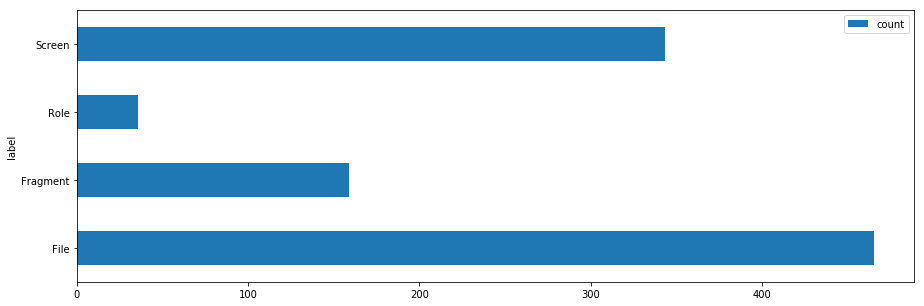

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# This will set the no truncate for pandas
pd.set_option('display.max_colwidth', -1)

# Set default figure size.
plt.rcParams['figure.figsize'] = (15, 5)

plt.show(dfReport.plot(x='label', kind='barh',stacked=True))

#### Screen report

In [18]:
# Define screen code
code = 'Screen_414'

get_screen_details = """

MATCH (s:Screen {code: $code})-[:AssociationRelationships]->(f:File), (s)-[:AssociationRelationships]->(r:Role)
OPTIONAL MATCH (s)-[:FlowRelationships]->(ss:Screen)
OPTIONAL MATCH (s)-[:CompositionRelationships*]->(fr:Fragment)
RETURN s.group AS group, 
       s.code AS code, 
       s.alias AS title,
       f.name AS file, 
       apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT ss.code)), ', ') AS screens, 
       apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT r.name)), ', ') AS roles, 
       apoc.text.join(apoc.coll.sort(COLLECT(DISTINCT fr.name)), ', ') AS fragments
ORDER BY s.group, s.code

"""

results = session.run(get_screen_details, code=code)

dfScreens = DataFrame([r.values() for r in results], columns=results.keys())

dfScreens = dfScreens.set_index('code')
dfScreens = dfScreens.sort_index().transpose()
dfScreens.head(10)

code,Screen_414
group,ADM
title,Title of Screen_414
file,Screen_414.jsp
screens,
roles,Role_1262
fragments,"Fragment_1328, Fragment_1329, Fragment_1330, Fragment_1331"


## Analysis

### Identification of communities

Weakly Connected Components (WCC) algorithm finds sets of connected nodes in an undirected graph, where all nodes in the same set form a connected component. The WCC algorithm helps quickly identify disconnected groups/independent communities.

How to identify communities in our graph:

In [19]:
# Run WCC in write mode. Parameter writeProperty is a node property in the Neo4j database to which the component ID is written.

call_wcc = '''

CALL gds.wcc.write({
  nodeProjection: '*',
  relationshipProjection: {
    relType: {
      type: '*',
      orientation: "UNDIRECTED",
      properties: {}
    }
  },
  writeProperty: "unionFind"
})

'''
    
results = session.run(call_wcc, parameters={})

df = DataFrame([r.values() for r in results], columns=results.keys())
df.head(1)

,writeMillis,nodePropertiesWritten,componentCount,componentDistribution,postProcessingMillis,createMillis,computeMillis,configuration
0,32,1003,10,"{'p99': 847, 'min': 5, 'max': 847, 'mean': 100.3, 'p90': 51, 'p50': 9, 'p999': 847, 'p95': 847, 'p75': 45}",53,120,6,"{'writeConcurrency': 4, 'seedProperty': None, 'consecutiveIds': False, 'writeProperty': 'unionFind', 'threshold': 0.0, 'relationshipWeightProperty': None, 'nodeLabels': ['*'], 'sudo': False, 'relationshipTypes': ['*'], 'concurrency': 4}"


Important is value in column **componentCount** (how many communities were created). We can see that the graph has **10** communities and this can be verified below by looking at the example graph.

How to get list of communities and number of nodes:

In [20]:
# Get list of communities and number of nodes

get_communities = """

MATCH (n) 
RETURN DISTINCT n.unionFind AS community, COUNT(n) AS count 
ORDER BY community, count

"""

results = session.run(get_communities, parameters={})

dfCommunities = DataFrame([r.values() for r in results], columns=results.keys())
dfCommunities.head(15)

,community,count
0,0,51
1,3,847
2,25,45
3,49,10
4,108,9
5,112,5
6,113,9
7,117,11
8,295,7
9,339,9


The graph visualization in Bloom is given below:

![Bloom All](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/bloom_all.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/bloom_all.jpg?raw=true")

As we can see, there are independent communities (independent groups of screens, fragments, roles and files).

### Identification of communities where fragments are used

Fragments are used only in two communities (larger circles represent fragments):

![Bloom Fragments](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/bloom_fragments.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/bloom_fragments.jpg?raw=true")

How to identify communities where fragments are used:

In [21]:
# Fragments are used only in two communities

get_communities_with_fragment = """

MATCH (node:Fragment)
WHERE exists(node.`unionFind`)
WITH node.`unionFind` AS community, collect(DISTINCT node.name) AS allNodes
RETURN community, allNodes[0..200] AS nodes, size(allNodes) AS size
ORDER BY size DESC

"""

results = session.run(get_communities_with_fragment, parameters={})
dfCommunitiesFragments = DataFrame([r.values() for r in results], columns=results.keys())
dfCommunitiesFragments.head(5)

,community,nodes,size
0,3,"[Fragment_1295, Fragment_1296, Fragment_1297, Fragment_1298, Fragment_1299, Fragment_1300, Fragment_1301, Fragment_1302, Fragment_1303, Fragment_1304, Fragment_1305, Fragment_1306, Fragment_1307, Fragment_1308, Fragment_1309, Fragment_1310, Fragment_1311, Fragment_1312, Fragment_1313, Fragment_1314, Fragment_1315, Fragment_1316, Fragment_1317, Fragment_1318, Fragment_1319, Fragment_1320, Fragment_1321, Fragment_1322, Fragment_1323, Fragment_1324, Fragment_1325, Fragment_1326, Fragment_1327, Fragment_1328, Fragment_1329, Fragment_1330, Fragment_1331, Fragment_1332, Fragment_1333, Fragment_1334, Fragment_1335, Fragment_1337, Fragment_1338, Fragment_1339, Fragment_1340, Fragment_1341, Fragment_1342, Fragment_1343, Fragment_1344, Fragment_1345, Fragment_1346, Fragment_1347, Fragment_1348, Fragment_1349, Fragment_1350, Fragment_1351, Fragment_1352, Fragment_1353, Fragment_1354, Fragment_1355, Fragment_1356, Fragment_1357, Fragment_1358, Fragment_1359, Fragment_1360, Fragment_1361, Fragment_1362, Fragment_1363, Fragment_1364, Fragment_1365, Fragment_1366, Fragment_1367, Fragment_1368, Fragment_1369, Fragment_1370, Fragment_1371, Fragment_1375, Fragment_1376, Fragment_1377, Fragment_1378, Fragment_1379, Fragment_1380, Fragment_1381, Fragment_1382, Fragment_1383, Fragment_1384, Fragment_1385, Fragment_1386, Fragment_1387, Fragment_1388, Fragment_1389, Fragment_1390, Fragment_1391, Fragment_1392, Fragment_1393, Fragment_1394, Fragment_1395, Fragment_1396, Fragment_1397, Fragment_1398, ...]",155
1,0,"[Fragment_1372, Fragment_1373, Fragment_1374]",3


### Identification of communities with lower number of screens than roles

One community has number of roles higher than number of screens (a picture below is from Graph Data Science Playground):

![GDS Roles](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/gds_roles.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/gds_roles.jpg?raw=true")

Diagram of the community where the number of roles higher than the number of screens looks like:

![EA Roles](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_roles.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_roles.jpg?raw=true")

How to identify communities where the number of roles is higher than the number of screens:

In [22]:
# Find cases where #Screens < #Roles in cluster

get_screens_roles = """

MATCH (screen:Screen), (role:Role)
WITH screen.unionFind AS communityScreen, 
     role.unionFind AS communityRole, 
	 collect(DISTINCT screen.name) AS allScreens, 
     collect(DISTINCT role.name) AS allRoles
WHERE communityScreen = communityRole
  AND size(allScreens) < size(allRoles)
RETURN communityScreen, allScreens, allRoles, size(allScreens) AS sizeScreens, size(allRoles) AS sizeRoles
ORDER BY sizeScreens DESC

"""

results = session.run(get_screens_roles, parameters={})

dfScreensRoles = DataFrame([r.values() for r in results], columns=results.keys())
dfScreensRoles.head(10)

,communityScreen,allScreens,allRoles,sizeScreens,sizeRoles
0,295,"[Screen_1211, Screen_1212]","[Role_1290, Role_1291, Role_1292]",2,3


### Identification of the missing role setting in a linked screen

On the right site, there is an example of expected role setting for linked screens. On the left site, there is an example of linked screens with missing role setting.

![Missing role setting](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_role_missing.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/ea_role_missing.jpg?raw=true")

How to identify the missing role setting in a linked screen:

In [23]:
# Missing role setting in a linked screen

get_missing_role = """

MATCH (f:Role)<-[:AssociationRelationships]-(a:Screen)-[:FlowRelationships]->(b:Screen)
WHERE NOT EXISTS((f)<-[:AssociationRelationships]-(b))
RETURN DISTINCT f.name AS role, a.name As ScreenWithRole, b.name As ScreenWithOutRole
ORDER BY role

"""

results = session.run(get_missing_role, parameters={})

dfMissingRole = DataFrame([r.values() for r in results], columns=results.keys())
dfMissingRole.head(30)

,role,ScreenWithRole,ScreenWithOutRole
0,Role_1260,Screen_1221,Screen_1222
1,Role_1260,Screen_1227,Screen_1223
2,Role_1260,Screen_1229,Screen_1223
3,Role_1260,Screen_1235,Screen_1223
4,Role_1260,Screen_1238,Screen_1223
5,Role_1260,Screen_1240,Screen_1223
6,Role_1261,Screen_1146,Screen_1147
7,Role_1261,Screen_1226,Screen_1227
8,Role_1261,Screen_1228,Screen_1229
9,Role_1261,Screen_1234,Screen_1235


### Identification of unused parts of the application

Individual roles of application are linked to groups defined in Active Directory. Users (their domain accounts) are assigned to the mentioned groups and the rights to access the individual screens of the application are controlled through roles. 

A [mapping](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ImportFromFile/group_role.csv "Mapping between roles, groups and accounts") between roles, groups and accounts exists. Example of the mapping:

*role;group;account<br>
Role_1259;Group_1259;domain\Amy<br>
Role_1259;Group_1259;domain\Bob<br>
Role_1260;Group_1260;domain\Bob<br>
Role_1261;Group_1261;domain\Amy*

After importing the groups and accounts to the graph, it is possible to identify unused parts of the application, there is no user with access to the screen. A visual scheme extension of our graph database is given below:

![Mapping between accounts, groups and roles](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/neo4j_db_schema_account_group_role.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/neo4j_db_schema_account_group_role.jpg?raw=true")

In [24]:
cypher_query = '''

LOAD CSV WITH HEADERS FROM $groupDefinitionUrl AS row FIELDTERMINATOR ';'
WITH
    row.role As role,
    row.group As group,
    row.account As account
    
	MATCH (r:Role {name: role})
    
    MERGE (g:Group:DataObject {class:'DataObject', name: group}) 
    ON CREATE SET g.id = 'NEOID_' + apoc.create.uuid(),
    			  g.documentation = 'Group <b>' + group + '</b>.'
                  
    MERGE (a:Account:DataObject {class:'DataObject', name: account}) 
    ON CREATE SET a.id = 'NEOID_' + apoc.create.uuid(),
    			  a.documentation = 'Account <b>' + account + '</b>.'
    
    MERGE (a)-[r1:AssociationRelationships {class: 'Association', name: 'IS_IN_GROUP'}]-(g)
    ON CREATE SET r1.id = 'NEOID_' + apoc.create.uuid()
    
    MERGE (g)-[r2:AssociationRelationships {class: 'Association', name: 'DEFINES_ACCESS'}]-(r)
    ON CREATE SET r2.id = 'NEOID_' + apoc.create.uuid()
;

'''

results = session.run(cypher_query, groupDefinitionUrl=groupDefinitionUrl)

Graph of roles (bigger circles) and screens (smaller circles) in Bloom looks like:

![Bloom Used Screens](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/bloom_roles_screens.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/bloom_roles_screens.jpg?raw=true")

Mark active and inactive roles:

In [25]:
set_role_used = """

//MATCH (n)
//WHERE EXISTS(n.used)
//REMOVE n.used

MATCH (r:Role) 
OPTIONAL MATCH (r)-[:AssociationRelationships]-(g:Group)<-[gar:AssociationRelationships]-(a:Account)
WITH r, COUNT(gar) AS count,
CASE COUNT(gar)
 	WHEN 0 THEN 0
	ELSE 1
END AS used

SET r.accounts = count, r.used = used

"""

results = session.run(set_role_used, parameters={})

Graph of roles (bigger circles) and screens (smaller circles) in Bloom, **active roles** are green and **inactive roles** are yellow.

![Bloom Used Screens](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/bloom_roles_used.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/bloom_roles_used.jpg?raw=true")

Mark active and inactive screens:

In [26]:
set_screen_used = """

MATCH (n:Role)<-[:AssociationRelationships]-(s:Screen)
WHERE n.used = 1

SET s.used = n.used

"""

set_screen_not_used = """

MATCH (s:Screen)
WHERE NOT EXISTS(s.used)

SET s.used = 0

"""

results = session.run(set_screen_used, parameters={})
results = session.run(set_screen_not_used, parameters={})

Graph of roles (bigger circles) and screens (smaller circles) in Bloom, **active roles and screens** are green and **inactive roles and screens** are yellow.

![Bloom Used Screens](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/bloom_used.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/bloom_used.jpg?raw=true")

How to identify inactive communities in the graph:

In [27]:
# Find inactive communities

get_inactive_communities = """

MATCH (screen:Screen), (role:Role)
WITH screen.unionFind AS communityScreen, 
     role.unionFind AS communityRole, 
	 collect(DISTINCT screen.name) AS allScreens, 
     collect(DISTINCT role.name) AS allRoles,
     SUM(role.accounts) AS accounts
WHERE communityScreen = communityRole
  AND accounts = 0
RETURN communityScreen, allScreens, allRoles, size(allScreens) AS sizeScreens, size(allRoles) AS sizeRoles, accounts
ORDER BY sizeScreens DESC

"""

results = session.run(get_inactive_communities, parameters={})

dfInactiveCommunities = DataFrame([r.values() for r in results], columns=results.keys())
dfInactiveCommunities.head(10)

,communityScreen,allScreens,allRoles,sizeScreens,sizeRoles,accounts
0,117,"[Screen_1033, Screen_1034, Screen_1035, Screen_1036]","[Role_1282, Role_1283, Role_1284]",4,3,0
1,339,"[Screen_1255, Screen_1256, Screen_1257, Screen_1258]",[Role_1294],4,1,0


### Identification of risky processes

A simple [mapping](https://github.com/pospisilboh/ScreenDocumentation/blob/main/ImportFromFile/screen_process.csv "Mapping between processes and the screens") between business processes and the screens of the application that support them exists. Example of the mapping:

*screen;process<br>
Screen_2026;Process_5<br>
Screen_2029;Process_5<br>
Screen_2032;Process_7<br>
Screen_387;Process_3<br>*

After importing the mapping to the graph, it is possible to identify which processes are at risk because there is only one person who can support the process via appropriate application screens. A visual scheme extension of our graph database is given below:

![Mapping between processes and screens](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/neo4j_db_schema_process_screen.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/neo4j_db_schema_process_screen.jpg?raw=true")

In [28]:
cypher_query = '''

LOAD CSV WITH HEADERS FROM $processDefinitionUrl AS row FIELDTERMINATOR ';'
WITH
    row.screen As screen,
    row.process As process
    
	MATCH (s:Screen {name: screen})
    
    MERGE (p:Process:BusinessProcess {class:'BusinessProcess', name: process}) 
    ON CREATE SET p.id = 'NEOID_' + apoc.create.uuid(),
    			  p.documentation = 'Process <b>' + process + '</b>.'
    
    MERGE (s)-[r:AssociationRelationships {class: 'Serving', name: 'SERVES_TO'}]-(p)
    ON CREATE SET r.id = 'NEOID_' + apoc.create.uuid()

'''

results = session.run(cypher_query, processDefinitionUrl=processDefinitionUrl)

How to identify risky processes:

In [29]:
get_risky_processes = '''

MATCH (process:Process)-[]-(screen:Screen)-[]-(role:Role)-[]-(:Group)-[]-(account:Account)
WITH process.name AS process, 
COLLECT(DISTINCT screen.name) AS screens, 
COLLECT(DISTINCT role.name) AS roles, 
COLLECT(DISTINCT account.name) AS accounts, 
SIZE(COLLECT(DISTINCT account.name)) AS countOfAccounts
WHERE SIZE(COLLECT(DISTINCT account.name)) = 1
RETURN process, roles, screens, accounts, countOfAccounts

'''

results = session.run(get_risky_processes, parameters={})

dfCriticalProcess = DataFrame([r.values() for r in results], columns=results.keys())
dfCriticalProcess.head(10)

,process,roles,screens,accounts,countOfAccounts
0,Process_9,[Role_1260],"[Screen_538, Screen_1138]",[domain\Bob],1


There is only one person (Account: domain\Bob) who can support business process (Process: Process_9) via screens (Screen: Screen_538 and Screen_1138):

![Risky processes](https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/risky_process.jpg?raw=true "https://github.com/pospisilboh/ScreenDocumentation/blob/main/Image/risky_process.jpg?raw=true")

# Reference